In [420]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [421]:
raw_data_file_name= "Data_to_Clustered/dilum_sir_route_without_duplications.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,lat,lon
0,A,6.758759,79.948375
1,A,6.757569,79.952875
2,A,6.752263,79.955845
3,A,6.751405,79.954408
4,A,6.749772,79.953156


In [422]:
raw_data.shape

(224, 3)

In [423]:
#features = ['lat','lon',]
#coordinates = raw_data[features]
#coordinates.head()

In [424]:
#coordinates.shape

In [425]:
#coordinates['coordinates'] = list(zip(coordinates.lon, coordinates.lat))

In [426]:
#coordinates.head()

In [427]:
#coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [428]:
#coordinates.head()

In [429]:
#gdf = GeoDataFrame(coordinates, geometry='coordinates')
#gdf.plot()

In [430]:
#print(gdf.head())

In [431]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Asia'].plot(
    #color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
#gdf.plot(ax=ax, color='red')

#plt.show()

In [432]:
#gdf.plot()

In [433]:
#kms_per_radian = 6371.0088
#epsilon = 0.01 / kms_per_radian
#print(epsilon)

In [434]:
kms_per_radian = 6371.0088
epsilon = 0.005 / kms_per_radian
coords = raw_data.as_matrix(columns=['lat', 'lon'])
#print(coords)

In [435]:
db = DBSCAN(eps = epsilon, min_samples=5, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))

In [436]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

In [437]:
cluster_labels 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype

In [438]:
db

DBSCAN(algorithm='ball_tree', eps=7.848050688613082e-07, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=5, n_jobs=1,
    p=None)

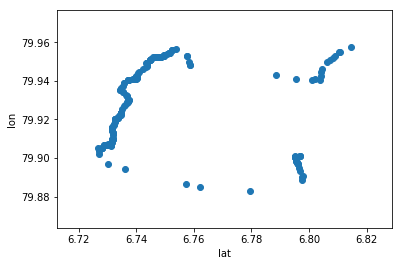

In [439]:
x = raw_data['lat']
y = raw_data['lon']

plt.scatter(x,y)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

In [440]:
db.core_sample_indices_

array([ 31,  77, 106, 113, 154, 208], dtype=int64)

In [441]:
result = raw_data
result['cluster'] = db.labels_
result = result.iloc[db.core_sample_indices_]
result.head()

,anomaly,lat,lon,cluster
31,A,6.731683,79.909552,0
77,A,6.731683,79.909552,0
106,A,6.734659,79.923194,1
113,A,6.731710,79.909550,0
154,A,6.731704,79.909548,0


In [442]:
result.shape

(6, 4)

In [443]:
result['cluster'].describe()

count    6.000000
mean     0.166667
std      0.408248
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
Name: cluster, dtype: float64

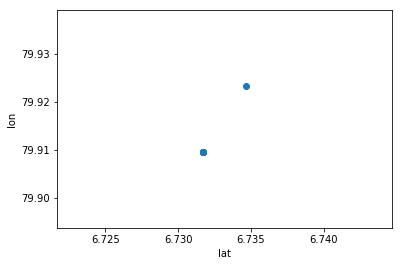

In [444]:
x = result['lat']
y = result['lon']
c = result['cluster']

#plt.scatter(x,y,c)
plt.scatter(x,y,label=c)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

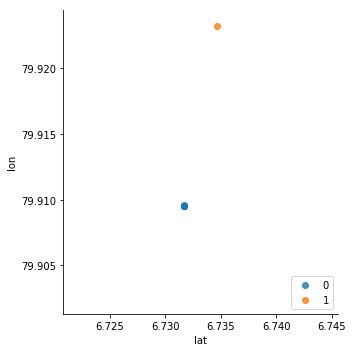

In [445]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=result, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [446]:
result.to_json("Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_5.json", orient='records')